**Name of Student** : Swapnoneel Kayal <br>
**Roll Number** : 200100154

## **Objective 1** : 
Learn various steps and due diligence needed to train successful classification models.

#### **Background** :

Some experiments were conducted on mice to see if a treatment of Down’s syndrome works or not. Mice were divided into control and diseased (genotype), treated or untreated and whether it shows a particular behavior or not (treatment_behavior). Readings for 77 proteins were recorded for the mice, but some of the readings were discarded if they seemed unreliable (out of range). Your job is to develop a pre-processing pipeline and a classifier, and also find out which subset of proteins is important in predicting which class. Specifically:


## **Task 1**

Let your code read the data directly from https://www.ee.iitb.ac.in/~asethi/Dump/MouseTrain.csv

In [ ]:
# Importing Necessarry Libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Reference Used : https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
# pd.read_csv -> Used to read a comma-separated values file into DataFrame
data  = pd.read_csv('https://www.ee.iitb.ac.in/~asethi/Dump/MouseTrain.csv')

## **Task 2**
Perform exploratory data analysis

In [ ]:
# Checking the data types of all columns
# Reference Used : https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dtypes.html
# DataFrame.dtypes -> returns a Series with the data type of each column

print(data.dtypes)

DYRK1A_N              float64
ITSN1_N               float64
BDNF_N                float64
NR1_N                 float64
NR2A_N                float64
                       ...   
EGR1_N                float64
H3MeK4_N              float64
CaNA_N                float64
Genotype               object
Treatment_Behavior     object
Length: 79, dtype: object


In [ ]:
# Brief summary of the given dataset
# Reference Used : https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html
# DataFrame.describe() -> generates descriptive statistics

print(data.describe())

         DYRK1A_N     ITSN1_N      BDNF_N       NR1_N      NR2A_N      pAKT_N  \
count  762.000000  762.000000  762.000000  762.000000  762.000000  762.000000   
mean     0.437715    0.629456    0.319844    2.311905    3.882665    0.232722   
std      0.275175    0.274954    0.046536    0.342923    0.929202    0.039521   
min      0.170634    0.264085    0.194160    1.414914    1.794716    0.063236   
25%      0.294759    0.481011    0.290199    2.069609    3.186726    0.206446   
50%      0.371534    0.569058    0.317696    2.309711    3.800418    0.229032   
75%      0.486749    0.700621    0.346747    2.534053    4.471656    0.255064   
max      2.516367    2.602662    0.497160    3.757641    8.482553    0.434624   

          pBRAF_N   pCAMKII_N     pCREB_N      pELK_N  ...       SHH_N  \
count  762.000000  762.000000  762.000000  762.000000  ...  762.000000   
mean     0.182514    3.513055    0.212083    1.447201  ...    0.226365   
std      0.026548    1.268395    0.031066    0.5

In [ ]:
# Extracting the dependent variables (y1,y2) and independent variables x
# Reference Used : https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html
# DataFrame.iloc -> Used for integer-location based indexing for selection by position

x = data.iloc[:,:-2] # all columns except the last two 

# For binary class
y1 = data.iloc[:,-2:-1].values # second last column

# For multi-class
y2 = data.iloc[:,-1].values # last column

In [ ]:
from sklearn.preprocessing import LabelEncoder
# LabelEncoder encodes target labels (y) with value between 0 and n_classes-1.
# This is done to convert categorical data type into numeric data type because mostly models run on numerical values only.

# For binary class
le_1 = LabelEncoder()
y11 = le_1.fit_transform(y1)

# For multi class
le_2 = LabelEncoder()
y22 = le_2.fit_transform(y2)

## **Task 2(a)**
Which variables are usable and which are not?

In [ ]:
# Strategy -> For each column, find it's data type, number of unique values and null values
# References Used : 
# (1) https://pandas.pydata.org/docs/reference/api/pandas.unique.html
# (2) https://pandas.pydata.org/docs/reference/api/pandas.isnull.html


col_lst = []
for col in x.columns.values:
  col_lst.append(col)
  lst_vl = pd.unique(x[col])
  print(col + ' is of type ' + str(x[col].dtype) + ' has ' + str(len(lst_vl)) + ' unique values and ' + str(x[col].isnull().sum()) + ' null values ')

DYRK1A_N is of type float64 has 762 unique values and 0 null values 
ITSN1_N is of type float64 has 761 unique values and 0 null values 
BDNF_N is of type float64 has 762 unique values and 0 null values 
NR1_N is of type float64 has 762 unique values and 0 null values 
NR2A_N is of type float64 has 762 unique values and 0 null values 
pAKT_N is of type float64 has 762 unique values and 0 null values 
pBRAF_N is of type float64 has 760 unique values and 0 null values 
pCAMKII_N is of type float64 has 762 unique values and 0 null values 
pCREB_N is of type float64 has 762 unique values and 0 null values 
pELK_N is of type float64 has 762 unique values and 0 null values 
pERK_N is of type float64 has 762 unique values and 0 null values 
pJNK_N is of type float64 has 761 unique values and 0 null values 
PKCA_N is of type float64 has 762 unique values and 0 null values 
pMEK_N is of type float64 has 762 unique values and 0 null values 
pNR1_N is of type float64 has 762 unique values and 0 n

## **Task 2(b)**
Are there significant correlations among variables?

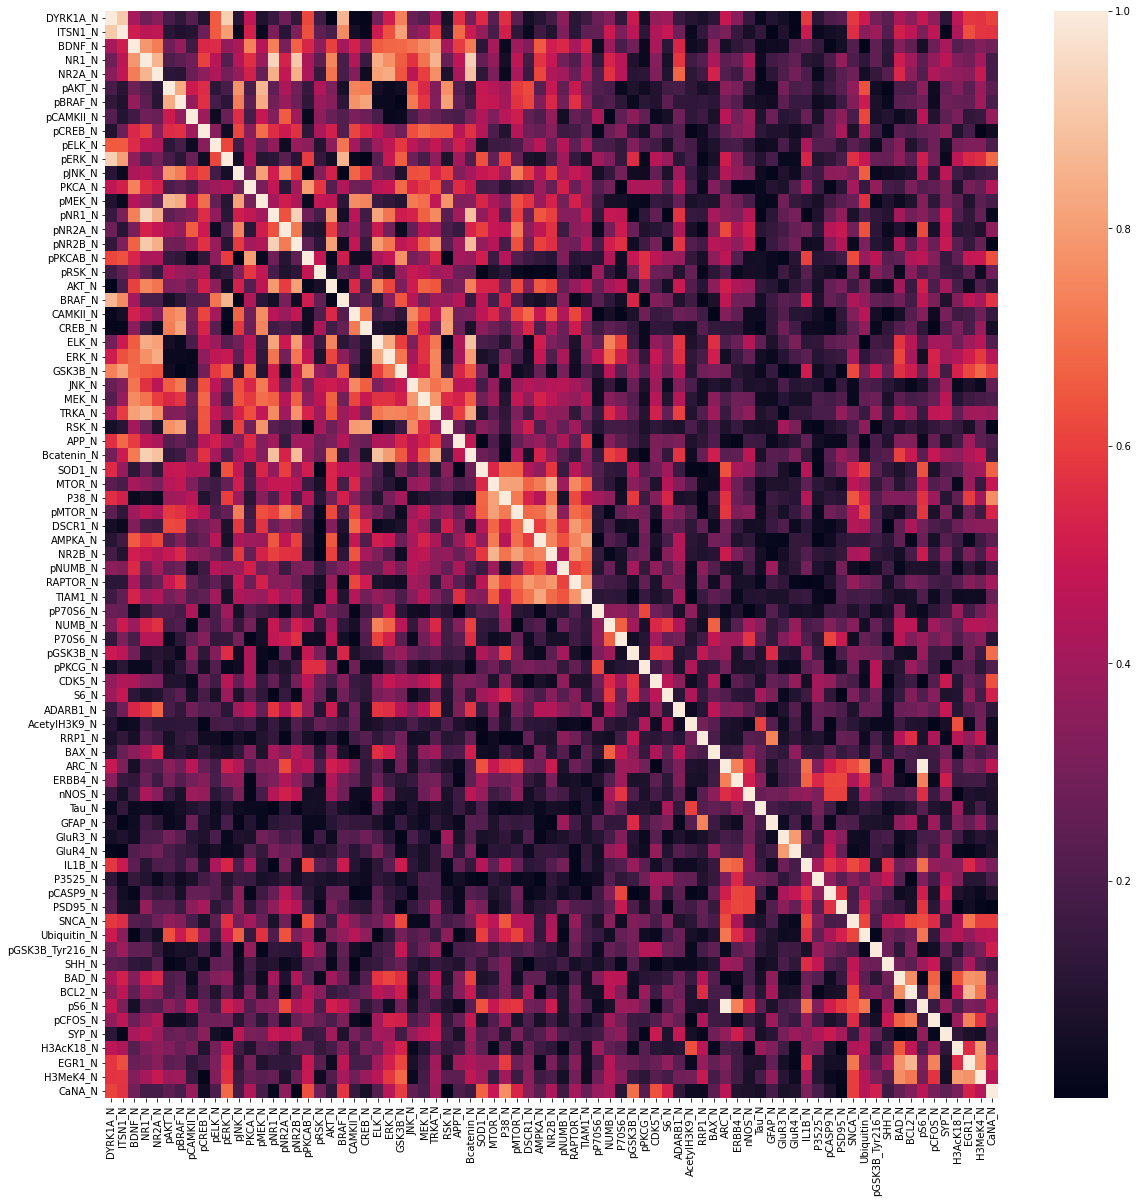

In [ ]:
# Strategy -> Plot correlation matrix using spearman method to find correlated variables
# Reference Used : https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html 

correlation_matrix = x.corr(method = 'spearman').abs() # Since perfect negative correlation is also perfect correlation hence we will plot for absolute values
fig, ax = plt.subplots(figsize = (20,20))
sns.heatmap(correlation_matrix, annot = False)
plt.show()

### **Observation**
White toned pixels are highly correlated hence we need to eliminate them (Expect the diagonal since a perfect correlation exists between the same variable)



In [ ]:
# Print list of columns to be dropped having more than 90% correlation
# Reference Used : https://numpy.org/doc/stable/reference/generated/numpy.triu.html

upper_triangular = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_triangular.columns if any(upper_triangular[column] > 0.90)]
print(to_drop)

['ITSN1_N', 'pERK_N', 'pNR1_N', 'pNR2B_N', 'Bcatenin_N', 'pS6_N']


In [ ]:
# Drop the highly correlated columns and create a new list of desired columns
# Reference Used : https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html

xd = x.drop(to_drop,axis = 1)
col_lst = []
for col in xd.columns.values:
  col_lst.append(col)

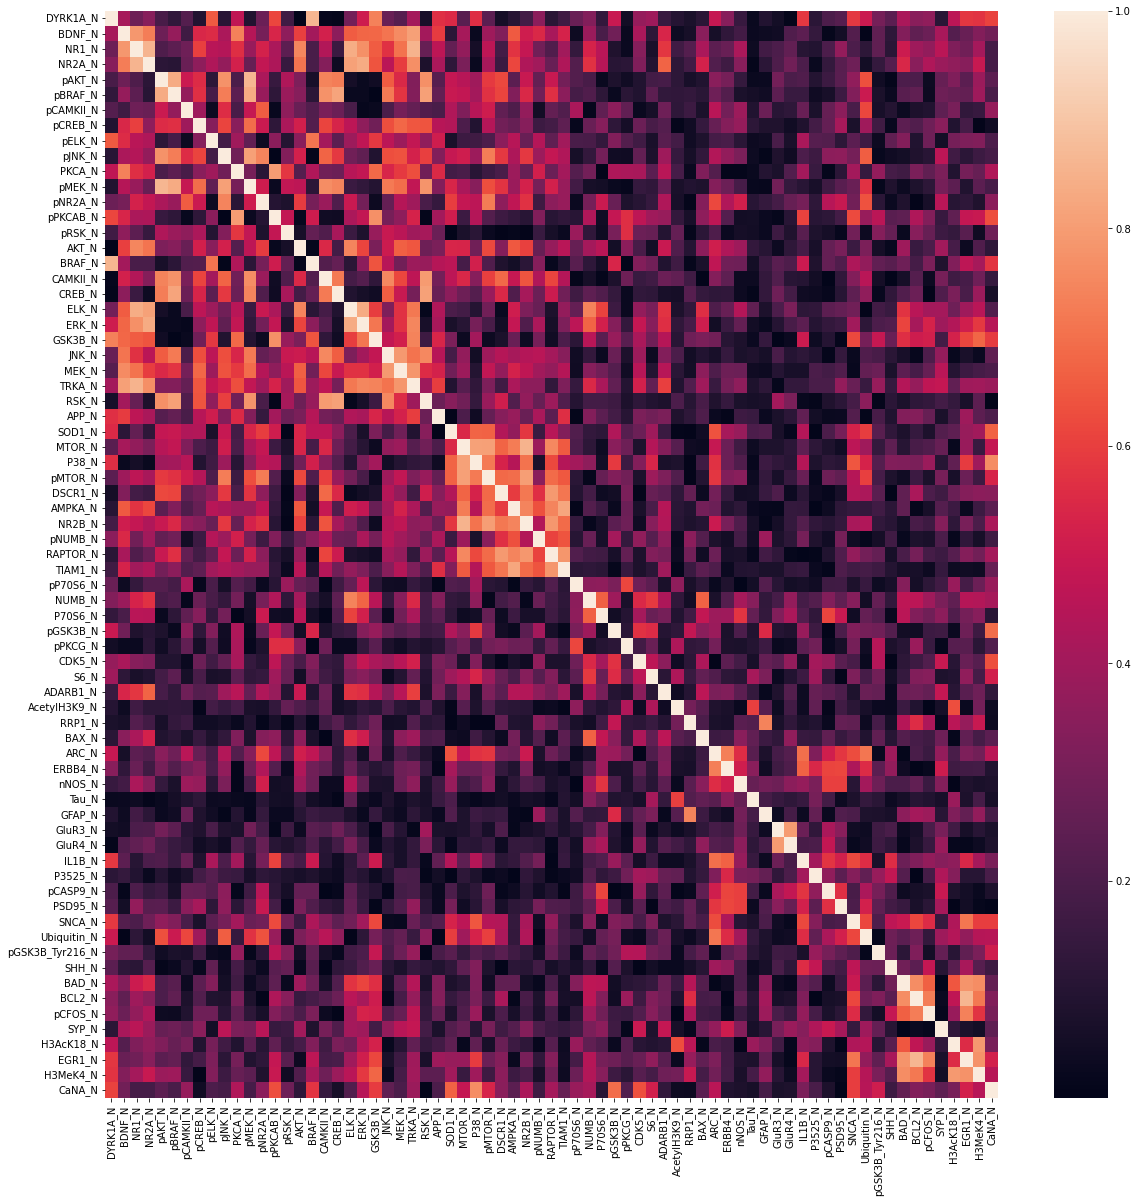

In [ ]:
# Again visualise the correlation matrix to see if any highly correlated variable remaining

correlation_matrix = xd.corr(method = 'spearman').abs()
fig, ax = plt.subplots(figsize = (20,20))
sns.heatmap(correlation_matrix, annot = False)
plt.show()

### **Observation**

Now, most of the data is very less correlated with each other hence we are ready for further processing

## **Task 2(c)**
Are the classes balanced?

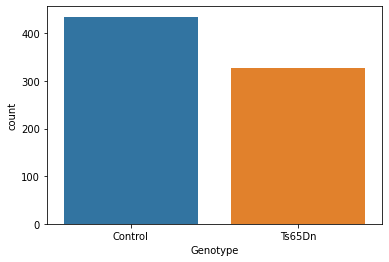

In [ ]:
# Plotting the count plot in order to visualize whether the classes are balanced or not?
# Reference Used : https://seaborn.pydata.org/generated/seaborn.countplot.html

graph = sns.countplot(data['Genotype'])

graph.set_xticklabels(['Control','Ts65Dn'])

plt.show()

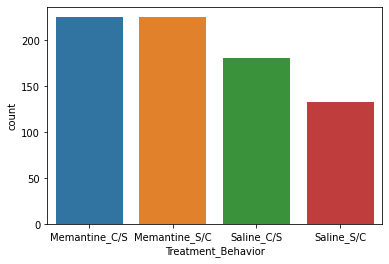

In [ ]:
graph = sns.countplot(data['Treatment_Behavior'])

graph.set_xticklabels(['Memantine_C/S' ,'Memantine_S/C' ,'Saline_C/S' ,'Saline_S/C'])

plt.show()

### **Observation**

As we can see there is almost equal distribution and no biasing in different classes, hence the classes are balanced not only for the binary-class classification case but also for the multi-class classification case.

## **Task 3**
Develop a strategy to deal with missing variables. You can choose to impute the variable. The recommended way is to use multivariate feature imputation (https://scikit-learn.org/stable/modules/impute.html)

In [ ]:
# Imputing the missing variables (to infer values of missing variables from the known part of the data) using multivariate feature imputation
# Reference Used : https://scikit-learn.org/stable/modules/impute.html

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(xd)
xd = imp.transform(xd)
print(xd)

[[0.50364388 0.4301753  2.81632854 ... 0.13179003 0.1281856  1.67565235]
 [0.51461708 0.41177034 2.78951404 ... 0.13510297 0.1311187  1.74360965]
 [0.50918309 0.41830878 2.68720107 ... 0.13336183 0.12743108 1.92642659]
 ...
 [0.38218182 0.31854545 2.072      ... 0.16364894 0.19121209 1.43351401]
 [0.3656217  0.29799225 2.00493131 ... 0.1406397  0.21389934 1.54327375]
 [0.36560487 0.30153901 2.06281317 ... 0.16626766 0.2061288  1.52011013]]


In [ ]:
# Scaling the data using standardScaler
# Reference Used : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
scaler.fit(xd)
xd = pd.DataFrame(scaler.transform(xd), columns = col_lst)
print(xd)

     DYRK1A_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  pCAMKII_N  \
0    0.239745  2.372452  1.471921  2.269552 -0.351734 -0.186528  -0.898820   
1    0.279648  1.976690  1.393675  1.940975 -0.533878 -0.365510  -0.963191   
2    0.259888  2.117287  1.095124  1.873152 -0.600347 -0.256006  -0.970144   
3    0.015969  0.833934  0.452418  1.181185 -0.249043 -0.228099  -1.073520   
4   -0.010091  0.837716  0.157224  0.900303 -0.496664 -0.334981  -1.087947   
..        ...       ...       ...       ...       ...       ...        ...   
757 -0.158354 -0.070527 -0.606540 -0.611634  0.045756  0.683866  -0.240028   
758 -0.130826  0.042935 -0.373432 -0.507093  0.096829  0.313293  -0.101537   
759 -0.201944 -0.027925 -0.700047 -0.871242  0.681455  0.761884  -0.399737   
760 -0.262164 -0.469880 -0.895755 -1.183635  0.319300  0.296632  -0.445606   
761 -0.262225 -0.393614 -0.726855 -1.001611  0.401220  0.614567  -0.349979   

      pCREB_N    pELK_N    pJNK_N  ...  pGSK3B_Tyr216_N     SHH

## **Task 4**
Select metrics that you will use, such as accuracy, F1 score, balanced accuracy, AUC etc. 

Accuracy, confusion matrix and AUC-ROC are some of the most popular metrics. 
<br>
Precision-recall is a widely used metric for classification problems.
<br>
<b> Accuracy </b> - Accuracy simply measures how often the classifier correctly predicts. We can define accuracy as the ratio of the number of correct predictions and the total number of predictions. However, <b> this metric is only good when the dataset is balanced. </b>
<br>
<b> Confusion Matrix </b> - It is defined as the table that is often used to describe the performance of a classification model on a set of test data for which the ground truth values are known. <b> By using the confusion matrix we can calculate precision, recall and F1 score. </b>
<br>
<b> AUC-ROC </b> - The Receiver Operator Characteristic (ROC) is a probability curve that plots the TPR (True Positive Rate) against the FPR (False Positive Rate) at various threshold levels.
<br>
<b> Final Conclusion </b>


*   For <b> binary class classificatio </b>, we will use balanced accuracy (mean of sensitivity and specificity), F1 score and ROC - AUC score because our classes are balanced.
*   For <b> multi-class classification </b>, we cannot use one over rest methods mentioned above since our true negatives will increase. Therefore, we will use another matrix i.e. micro or macro averages of F1 score.

References Used : 

* https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62
* https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5
* https://datascience.stackexchange.com/questions/15989/micro-average-vs-macro-average-performance-in-a-multiclass-classification-settin





## **Task 5**
Using five-fold cross-validation to find the reasonable hyper-parameter settings for the following model types:

In [18]:
# Importing necessarry libraries

from sklearn.model_selection import GridSearchCV # GridSearch helps to loop through predefined hyperparameters and fit our estimator (model) on our training set
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn import svm
from sklearn.linear_model import LogisticRegression

a. Linear SVM with regularization as hyperparameter

In [ ]:
# Binary classification
# Reference Used : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

hyper = {'C' : [0.001,0.01,0.1,1,10]} # Regularization is the only hyperparameter that is to be tuned
svc = svm.SVC(kernel='linear', probability = True)
scoring = ['balanced_accuracy', 'f1', 'roc_auc']

for i in scoring:
  clf = GridSearchCV(estimator = svc, param_grid = hyper, scoring = i) # since cv = None -> We wish to use the default 5-fold cross validation splitting strategy
  clf.fit(np.array(xd),np.squeeze(y11))
  print('Best hyperparameter : ', clf.best_params_) # Print best parameter after tuning
  print('Best ' + i + ' : ' + str(clf.best_score_))

Best hyperparameter :  {'C': 0.01}
Best balanced_accuracy : 0.7943533478016236
Best hyperparameter :  {'C': 0.01}
Best f1 : 0.7627587395089508
Best hyperparameter :  {'C': 0.01}
Best roc_auc : 0.8505007636042119


In [ ]:
# Multi-class classification

hyper = {'C' : [0.001,0.01,0.1,1,10]} # Regularization is the only hyperparameter
svc = svm.SVC(kernel='linear', probability = True)
scoring = ['f1_macro', 'roc_auc_ovr']

for i in scoring:
  clf = GridSearchCV(estimator = svc, param_grid = hyper, scoring = i)
  clf.fit(np.array(xd),np.squeeze(y22))
  print('Best hyperparameter : ', clf.best_params_) # Print best parameter after tuning
  print('Best ' + i + ' : ' + str(clf.best_score_))

Best hyperparameter :  {'C': 0.1}
Best f1_macro : 0.7507966138359332
Best hyperparameter :  {'C': 0.1}
Best roc_auc_ovr : 0.9096260173042723


b. RBF kernel SVM with kernel width and regularization as hyperparameters 

In [ ]:
# Binary classification

hyper = {'C' : [0.001,0.01,0.1,1,10], 'degree' : [2,3,5,7]} # Regularization and kernel width are the only hyperparameters that are to be tuned
svc = svm.SVC(kernel='rbf', probability = True)
scoring = ['balanced_accuracy', 'f1', 'roc_auc']

for i in scoring:
  clf = GridSearchCV(estimator = svc, param_grid = hyper, scoring = i) # since cv = None -> We wish to use the default 5-fold cross validation splitting strategy
  clf.fit(np.array(xd),np.squeeze(y11))
  print('Best hyperparameter : ', clf.best_params_) # Print best parameter after tuning
  print('Best ' + i + ' : ' + str(clf.best_score_))

Best hyperparameter :  {'C': 10, 'degree': 2}
Best balanced_accuracy : 0.7325142673418534
Best hyperparameter :  {'C': 10, 'degree': 2}
Best f1 : 0.6838467254558587
Best hyperparameter :  {'C': 10, 'degree': 2}
Best roc_auc : 0.8111920263644402


In [ ]:
# Multi-class classification

hyper = {'C' : [0.001,0.01,0.1,1,10], 'degree' : [2,3,5,7]} # Regularization and kernel width are the only hyperparameters that are to be tuned
svc = svm.SVC(kernel='rbf', probability = True)
scoring = ['f1_macro', 'roc_auc_ovr']

for i in scoring:
  clf = GridSearchCV(estimator = svc, param_grid = hyper, scoring = i)
  clf.fit(np.array(xd),np.squeeze(y22))
  print('Best hyperparameter : ', clf.best_params_) # Print best parameter after tuning
  print('Best ' + i + ' : ' + str(clf.best_score_))

Best hyperparameter :  {'C': 1, 'degree': 2}
Best f1_macro : 0.7221908291604143
Best hyperparameter :  {'C': 10, 'degree': 2}
Best roc_auc_ovr : 0.9093993884996319


c. Neural network with single ReLU hidden layer and Softmax output (hyperparameters: number of
neurons, weight decay)

In [ ]:
# Binary classification
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(activation='relu')
param = {'alpha' : [0.001, 0.01, 0.1,1,10], 'hidden_layer_sizes' : [(10,),(15,),(20,),(30,),(50,)]}
scoring = ['balanced_accuracy','f1','roc_auc']

for i in scoring:
  clf = GridSearchCV(estimator = nn, param_grid = param, scoring = i)
  clf.fit(np.array(xd),np.squeeze(y11))
  print('Best hyperparameter : ', clf.best_params_) # Print best parameter after tuning
  print('Best ' + i + ' : ' + str(clf.best_score_))

Best hyperparameter :  {'alpha': 1, 'hidden_layer_sizes': (20,)}
Best balanced_accuracy : 0.7516373281890523
Best hyperparameter :  {'alpha': 1, 'hidden_layer_sizes': (50,)}
Best f1 : 0.7480573309706928
Best hyperparameter :  {'alpha': 1, 'hidden_layer_sizes': (20,)}
Best roc_auc : 0.8072057444471238


In [ ]:
# Multi-class classification

nn = MLPClassifier(activation='relu')
param = {'alpha' : [0.001, 0.01, 0.1,1,10], 'hidden_layer_sizes' : [(10,),(15,),(20,),(30,),(50,)]}
scoring = ['f1_macro','roc_auc_ovr']

for i in scoring:
  clf = GridSearchCV(estimator = nn, param_grid = param, scoring = i)
  clf.fit(np.array(xd),np.squeeze(y22))
  print('Best hyperparameter : ', clf.best_params_) # Print best parameter after tuning
  print('Best ' + i + ' : ' + str(clf.best_score_))

Best hyperparameter :  {'alpha': 0.1, 'hidden_layer_sizes': (30,)}
Best f1_macro : 0.7459346906550578
Best hyperparameter :  {'alpha': 0.001, 'hidden_layer_sizes': (20,)}
Best roc_auc_ovr : 0.9047293946807858


d. Random forest (max tree depth, max number of variables per node)

In [ ]:
# Binary classification
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
param = {'max_depth' : [2,4,6,8,10], 'max_features' : ['auto','sqrt','log2']}
scoring = ['balanced_accuracy','f1','roc_auc']

for i in scoring:
  clf = GridSearchCV(estimator = rf, param_grid = param, scoring = i, n_jobs = -1)
  clf.fit(np.array(xd),np.squeeze(y11))
  print('Best hyperparameter : ', clf.best_params_) # Print best parameter after tuning
  print('Best ' + i + ' : ' + str(clf.best_score_))

Best hyperparameter :  {'max_depth': 8, 'max_features': 'log2'}
Best balanced_accuracy : 0.6530680813439436
Best hyperparameter :  {'max_depth': 8, 'max_features': 'sqrt'}
Best f1 : 0.5831828206385985
Best hyperparameter :  {'max_depth': 10, 'max_features': 'sqrt'}
Best roc_auc : 0.7458473327438844


In [ ]:
# Multi-class classification
rf = RandomForestClassifier()
param = {'max_depth': [2,4,6,8,10], 'max_features' : ['auto','sqrt','log2']}
scoring = ['f1_macro','roc_auc_ovr']

for i in scoring:
  clf = GridSearchCV(estimator = rf, param_grid = param, scoring = i, n_jobs = -1)
  clf.fit(np.array(xd),np.squeeze(y22))
  print('Best hyperparameter : ', clf.best_params_) # Print best parameter after tuning
  print('Best ' + i + ' : ' + str(clf.best_score_))

Best hyperparameter :  {'max_depth': 10, 'max_features': 'sqrt'}
Best f1_macro : 0.6559517757619531
Best hyperparameter :  {'max_depth': 10, 'max_features': 'auto'}
Best roc_auc_ovr : 0.8945966052964209


## **Task 6**
Check feature importance for each model to see if the same proteins are important for each model. 

RFE (Recursive Feature Elimination) is a wrapper-type feature selection algorithm. This means that a different machine learning algorithm is given and used in the core of the method, is wrapped by RFE, and used to help select features.

<br>
The RFECV is configured just like the RFE class regarding the choice of the algorithm that is wrapped. Additionally, the minimum number of features to be considered can be specified via the "min_features_to_select" argument (defaults to 1) and we can also specify the type of cross-validation and scoring to use via the "cv" (defaults to 5) and "scoring" arguments (uses accuracy for classification)

In [ ]:
# We will be using the SVM estimator with linear kernel for binary classification
from sklearn.feature_selection import RFECV 

svc = svm.SVC(kernel = 'linear')
svc.fit(xd,y11)
selector = RFECV(estimator = svc, step=1, cv=2)
selector = selector.fit(xd, y11)
z = selector.ranking_ 
# We can now see the ranking of features that are helpful in predicting the target
print("Ranking of features : \n",z)

Ranking of features : 
 [ 1 26  1 10  3 28  1  7 39  5 13 46  4 45 15  9  1 12  1  8  1 30 31 22
  1  2  1 29  1 19 17  1  1 44  1  1  1  1  1  6 41  1 24 25 11 35 43 32
 36  1 33 38 40  1 23 20 21  1 27  1  1  1 37 42 18  1  1 34 16 14  1]


<b> We will now check the number of features that contribute to the target variable by plotting </b>

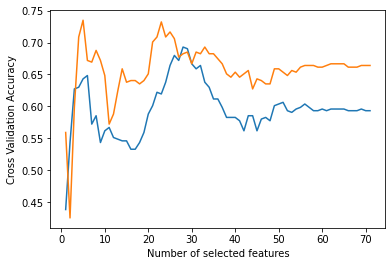

In [ ]:
min_features_to_select = 1
plt.figure()
plt.xlabel("Number of selected features")
plt.ylabel("Cross Validation Accuracy")
plt.plot(
    range(min_features_to_select, len(selector.cv_results_['split0_test_score']) + min_features_to_select),
    selector.cv_results_['split0_test_score'],
)
plt.plot(
    range(min_features_to_select, len(selector.cv_results_['split1_test_score']) + min_features_to_select),
    selector.cv_results_['split1_test_score'],
)
plt.show()

<b> Observation : </b>
<br>
We can notice that with 8 features we can achieve approximately 85% accuracy.

In [ ]:
# We will store the names of those features seen during fit
q = selector.feature_names_in_

In [ ]:
res = dict(zip(q, z)) # We are making a dictionary where key -> feature name and it's corresponding value -> the rank of the feature 
col_1 = [] # Column 1 is a list which will store all the selected features. Criteria for the feature to be selected : Rank of feature <= 8
for i,j in res.items():
  if j <= 8:
    col_1.append(i)
print(col_1)    

['DYRK1A_N', 'NR1_N', 'pAKT_N', 'pCAMKII_N', 'pCREB_N', 'pJNK_N', 'pNR2A_N', 'BRAF_N', 'CREB_N', 'ELK_N', 'ERK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'MTOR_N', 'DSCR1_N', 'AMPKA_N', 'pNUMB_N', 'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N', 'pPKCG_N', 'ERBB4_N', 'GluR3_N', 'pCASP9_N', 'SNCA_N', 'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'pCFOS_N', 'SYP_N', 'CaNA_N']


In [ ]:
x1 = pd.DataFrame(xd, columns = col_1)
print(x1)

     DYRK1A_N     NR1_N    pAKT_N  pCAMKII_N   pCREB_N    pJNK_N   pNR2A_N  \
0    0.239745  1.471921 -0.351734  -0.898820  0.648744 -0.148771 -0.638085   
1    0.279648  1.393675 -0.533878  -0.963191  0.479587 -0.292219 -0.735638   
2    0.259888  1.095124 -0.600347  -0.970144  0.585066 -0.444364 -0.655447   
3    0.015969  0.452418 -0.249043  -1.073520 -0.163587 -0.337665 -1.097899   
4   -0.010091  0.157224 -0.496664  -1.087947 -0.641792 -0.528799 -1.164159   
..        ...       ...       ...        ...       ...       ...       ...   
757 -0.158354 -0.606540  0.045756  -0.240028  0.313292  0.075654 -0.308574   
758 -0.130826 -0.373432  0.096829  -0.101537  0.638293  0.309205 -0.078981   
759 -0.201944 -0.700047  0.681455  -0.399737  0.366285  0.793714 -0.358233   
760 -0.262164 -0.895755  0.319300  -0.445606  0.174685  0.231584 -0.403817   
761 -0.262225 -0.726855  0.401220  -0.349979  0.471977  0.729980 -0.344617   

       BRAF_N    CREB_N     ELK_N  ...   pPKCG_N   ERBB4_N   Gl

In [ ]:
# We will be using the SVM estimator with linear kernel for multi-class classification
from sklearn.feature_selection import RFECV

svc = svm.SVC(kernel = 'linear')
svc.fit(xd,y22)
selector = RFECV(estimator = svc, step=1, cv=10)
selector = selector.fit(xd, y22)
z = selector.ranking_ 
# We can now see the ranking of features that are helpful in predicting the target
print("Ranking of features : \n",z)

Ranking of features : 
 [10  1  1  1 15  1  1  7 18  1  1 21  1  1 27  1  1  1 11  2  1  1 20  9
  1  4  1  1  1  1  1  1 19 28  1  1  6 16 13  1 22  1  1  1  5  8  3  1
 12 17  1  1  1  1 14  1  1  1 24  1  1  1  1 30  1 25 29 26 31 23  1]


<b> We will now check the number of features that contribute to the target variable by plotting </b>

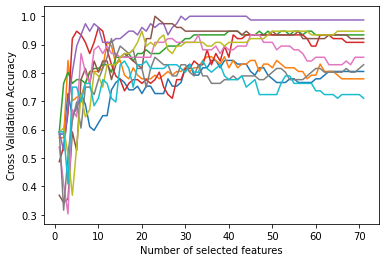

In [ ]:
min_features_to_select = 1
plt.figure()
plt.xlabel("Number of selected features")
plt.ylabel("Cross Validation Accuracy")
plt.plot(
    range(min_features_to_select, len(selector.cv_results_['split0_test_score']) + min_features_to_select),
    selector.cv_results_['split0_test_score'],
)
plt.plot(
    range(min_features_to_select, len(selector.cv_results_['split1_test_score']) + min_features_to_select),
    selector.cv_results_['split1_test_score'],
)
plt.plot(
    range(min_features_to_select, len(selector.cv_results_['split2_test_score']) + min_features_to_select),
    selector.cv_results_['split2_test_score'],
)
plt.plot(
    range(min_features_to_select, len(selector.cv_results_['split3_test_score']) + min_features_to_select),
    selector.cv_results_['split3_test_score'],
)
plt.plot(
    range(min_features_to_select, len(selector.cv_results_['split4_test_score']) + min_features_to_select),
    selector.cv_results_['split4_test_score'],
)
plt.plot(
    range(min_features_to_select, len(selector.cv_results_['split5_test_score']) + min_features_to_select),
    selector.cv_results_['split5_test_score'],
)
plt.plot(
    range(min_features_to_select, len(selector.cv_results_['split6_test_score']) + min_features_to_select),
    selector.cv_results_['split6_test_score'],
)
plt.plot(
    range(min_features_to_select, len(selector.cv_results_['split7_test_score']) + min_features_to_select),
    selector.cv_results_['split7_test_score'],
)
plt.plot(
    range(min_features_to_select, len(selector.cv_results_['split8_test_score']) + min_features_to_select),
    selector.cv_results_['split8_test_score'],
)
plt.plot(
    range(min_features_to_select, len(selector.cv_results_['split9_test_score']) + min_features_to_select),
    selector.cv_results_['split9_test_score'],
)
plt.show()

<b> Observation : </b>
<br>
We can notice that with 8 features we can achieve approximately 95% accuracy.

In [ ]:
res = dict(zip(q,z)) 
col_2 = []

for i,j in res.items():
  if j<=8:
    col_2.append(i)
print(col_2)

['BDNF_N', 'NR1_N', 'NR2A_N', 'pBRAF_N', 'pCAMKII_N', 'pCREB_N', 'pJNK_N', 'PKCA_N', 'pNR2A_N', 'pPKCAB_N', 'AKT_N', 'BRAF_N', 'CAMKII_N', 'ELK_N', 'ERK_N', 'GSK3B_N', 'TRKA_N', 'RSK_N', 'APP_N', 'SOD1_N', 'MTOR_N', 'P38_N', 'pMTOR_N', 'DSCR1_N', 'pNUMB_N', 'RAPTOR_N', 'TIAM1_N', 'P70S6_N', 'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N', 'RRP1_N', 'BAX_N', 'nNOS_N', 'Tau_N', 'GFAP_N', 'GluR3_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'SNCA_N', 'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BCL2_N', 'CaNA_N']


In [ ]:
x2 = pd.DataFrame(xd, columns = col_2)
print(x2)

       BDNF_N     NR1_N    NR2A_N   pBRAF_N  pCAMKII_N   pCREB_N    pJNK_N  \
0    2.372452  1.471921  2.269552 -0.186528  -0.898820  0.648744 -0.148771   
1    1.976690  1.393675  1.940975 -0.365510  -0.963191  0.479587 -0.292219   
2    2.117287  1.095124  1.873152 -0.256006  -0.970144  0.585066 -0.444364   
3    0.833934  0.452418  1.181185 -0.228099  -1.073520 -0.163587 -0.337665   
4    0.837716  0.157224  0.900303 -0.334981  -1.087947 -0.641792 -0.528799   
..        ...       ...       ...       ...        ...       ...       ...   
757 -0.070527 -0.606540 -0.611634  0.683866  -0.240028  0.313292  0.075654   
758  0.042935 -0.373432 -0.507093  0.313293  -0.101537  0.638293  0.309205   
759 -0.027925 -0.700047 -0.871242  0.761884  -0.399737  0.366285  0.793714   
760 -0.469880 -0.895755 -1.183635  0.296632  -0.445606  0.174685  0.231584   
761 -0.393614 -0.726855 -1.001611  0.614567  -0.349979  0.471977  0.729980   

       PKCA_N   pNR2A_N  pPKCAB_N  ...   GluR3_N    IL1B_N   P3

## **Task 7**  

See if removing some features systematically will improve your models (e.g. using recursive feature elimination)

In [ ]:
# Using SVM for binary classification
hyper = {'kernel':('rbf','linear','poly'),'C':[.001,.01,1,10],'degree':[2,3,5,8]}
svc = svm.SVC(probability = True)
scoring = ['balanced_accuracy','f1','roc_auc']

for i in scoring:
  clf = GridSearchCV(estimator = svc, param_grid = hyper, scoring = i)
  clf.fit(np.array(x1),np.squeeze(y11))
  print('Best hyperparameter : ', clf.best_params_) # Print best parameter after tuning
  print('Best ' + i + ' : ' + str(clf.best_score_))

Best hyperparameter :  {'C': 1, 'degree': 2, 'kernel': 'linear'}
Best balanced_accuracy : 0.8790515231894542
Best hyperparameter :  {'C': 1, 'degree': 2, 'kernel': 'linear'}
Best f1 : 0.8619461015052112
Best hyperparameter :  {'C': 1, 'degree': 2, 'kernel': 'linear'}
Best roc_auc : 0.9550625619591135


In [ ]:
# Using SVM for multi-class classification
hyper = {'kernel':('rbf','linear','poly'),'C':[.001,.01,1,10],'degree':[2,3,5,8]}
svc = svm.SVC(probability = True)
scoring = ['f1_macro','roc_auc_ovr']

for i in scoring:
  clf = GridSearchCV(estimator = svc, param_grid = hyper, scoring = i)
  clf.fit(np.array(x2),np.squeeze(y22))
  print('Best hyperparameter : ', clf.best_params_) # Print best parameter after tuning
  print('Best ' + i + ' : ' + str(clf.best_score_))

Best hyperparameter :  {'C': 10, 'degree': 2, 'kernel': 'linear'}
Best f1_macro : 0.8428961809802145
Best hyperparameter :  {'C': 10, 'degree': 3, 'kernel': 'linear'}
Best roc_auc_ovr : 0.9549818227307082


In [ ]:
# Using Neural Network for binary classification
from sklearn.neural_network import MLPClassifier  #using neural network for binary

nn = MLPClassifier()
param = {'alpha' : [0.001, 0.01, 0.1, 1, 10], 'hidden_layer_sizes' : [(10,),(15,),(20,),(30,),(50,)]}
scoring = ['balanced_accuracy','f1','roc_auc']

for i in scoring:
  clf = GridSearchCV(estimator = nn, param_grid = param, scoring = i)
  clf.fit(np.array(x1), np.squeeze(y11))
  print('Best hyperparameter : ', clf.best_params_) # Print best parameter after tuning
  print('Best ' + i + ' : ' + str(clf.best_score_))

Best hyperparameter :  {'alpha': 0.001, 'hidden_layer_sizes': (15,)}
Best balanced_accuracy : 0.9099356964874208
Best hyperparameter :  {'alpha': 0.1, 'hidden_layer_sizes': (30,)}
Best f1 : 0.894529427348786
Best hyperparameter :  {'alpha': 0.1, 'hidden_layer_sizes': (30,)}
Best roc_auc : 0.9665696755351929


In [ ]:
# Using Neural Network for multi-class classification

nn = MLPClassifier()
param = {'alpha' : [0.001, 0.01, 0.1, 1, 10], 'hidden_layer_sizes' : [(10,),(15,),(20,),(30,),(50,)]}
scoring = ['f1_macro','roc_auc_ovr']

for i in scoring:
  clf = GridSearchCV(estimator = nn, param_grid = param, scoring = i)
  clf.fit(np.array(x2), np.squeeze(y22))
  print('Best hyperparameter : ', clf.best_params_) # Print best parameter after tuning
  print('Best ' + i + ' : ' + str(clf.best_score_))

Best hyperparameter :  {'alpha': 0.1, 'hidden_layer_sizes': (50,)}
Best f1_macro : 0.7746852849033798
Best hyperparameter :  {'alpha': 0.1, 'hidden_layer_sizes': (50,)}
Best roc_auc_ovr : 0.9262731923520766


In [ ]:
# Using Random Forest for binary classification

rf = RandomForestClassifier()
param = {'max_depth': [2,4,6,8,10], 'max_features':['auto','sqrt','log2']}
scoring = ['balanced_accuracy','f1','roc_auc']

for i in scoring:
  clf = GridSearchCV(estimator = rf, param_grid = param,scoring = i, n_jobs = -1)
  clf.fit(np.array(x1),np.squeeze(y11))
  print('Best hyperparameter : ', clf.best_params_) # Print best parameter after tuning
  print('Best ' + i + ' : ' + str(clf.best_score_))

Best hyperparameter :  {'max_depth': 6, 'max_features': 'auto'}
Best balanced_accuracy : 0.8008182621975726
Best hyperparameter :  {'max_depth': 8, 'max_features': 'sqrt'}
Best f1 : 0.7787055170906767
Best hyperparameter :  {'max_depth': 6, 'max_features': 'auto'}
Best roc_auc : 0.8763009404388715


In [ ]:
# Using Random Forest for multi-class classification

rf = RandomForestClassifier()
param = {'max_depth': [2,4,6,8,10], 'max_features':['auto','sqrt','log2']}
scoring = ['f1_macro','roc_auc_ovr']

for i in scoring:
  clf = GridSearchCV(estimator = rf, param_grid = param,scoring = i, n_jobs = -1)
  clf.fit(np.array(x2),np.squeeze(y22))
  print('Best hyperparameter : ', clf.best_params_) # Print best parameter after tuning
  print('Best ' + i + ' : ' + str(clf.best_score_))

Best hyperparameter :  {'max_depth': 10, 'max_features': 'sqrt'}
Best f1_macro : 0.6880646104439387
Best hyperparameter :  {'max_depth': 10, 'max_features': 'log2'}
Best roc_auc_ovr : 0.9115121817428278


<b> Observation </b>
<br>
<table>
  <tr>
    <th>Model</th>
    <th>Accuracy before Feature Selection</th>
    <th>Accuracy after Feature Selection</th>
  </tr>
  <tr>
    <td>SVM (Binary)</td>
    <td>
    balanced_accuracy : 0.7943533478016236
    <br>
    f1 : 0.7627587395089508
    <br>
    roc_auc : 0.8491230608471987
    </td>
    <td>
    balanced_accuracy : 0.8790515231894542
    <br>
    f1 : 0.8619461015052112
    <br>
    roc_auc : 0.9550625619591135
    </td>
  </tr>
  <tr>
    <td>SVM (Multi-class)</td>
    <td>
    f1_macro : 0.7507966138359332
    <br>
    roc_auc_ovr : 0.9096260173042723
    </td>
    <td>
    f1_macro : 0.8428961809802145
    <br>
    roc_auc_ovr : 0.9549818227307082
    </td>
  </tr>
  <tr>
    <td>Neural Network (Binary)</td>
    <td>
    balanced_accuracy : 0.7516373281890523
    <br>
    f1 : 0.7480573309706928
    <br>
    roc_auc : 0.8072057444471238
    </td>
    <td>
    balanced_accuracy : 0.9099356964874208
    <br>
    f1 : 0.894529427348786
    <br>
    roc_auc : 0.9665696755351929
    </td>
  </tr>
  <tr>
    <td>Neural Network (Multi-class)</td>
    <td>
    f1_macro : 0.7459346906550578
    <br>
    roc_auc_ovr : 0.9047293946807858
    </td>
    <td>
    f1_macro : 0.7746852849033798
    <br>
    roc_auc_ovr : 0.9262731923520766
    </td>
  </tr>
  <tr>
    <td>Random Forest (Binary)</td>
    <td>
    balanced_accuracy : 0.6559545052648501
    <br>
    f1 : 0.593618228976246
    <br>
    roc_auc : 0.7366787235752753
    </td>
    <td>
    balanced_accuracy : 0.8008182621975726
    <br>
    f1 : 0.7787055170906767
    <br>
    roc_auc : 0.8763009404388715
    </td>
  </tr>
  <tr>
    <td>Random Forest (Multi-class)</td>
    <td>
    f1_macro : 0.6559517757619531
    <br>
    roc_auc_ovr : 0.8945966052964209
    </td>
    <td>
    f1_macro : 0.6880646104439387
    <br>
    roc_auc_ovr : 0.9115121817428278
    </td>
  </tr>
</table>
<br>
<b> We can see that after feature selection, the accuracy has increased in ALL the models. </b>

## **Task 8**  

Finally, test a few promising models on the test data : https://www.ee.iitb.ac.in/~asethi/Dump/MouseTest.csv 

In [18]:
# Reading the test data
test = pd.read_csv('https://www.ee.iitb.ac.in/~asethi/Dump/MouseTest.csv')

test_x = test.iloc[:, :-2]
test_y = test.iloc[:,-2:].values

ty1 = test_y[:,:-1] # Binary classification
ty2 = test_y[:,-1]  # Multi-class classification

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
ty1 = le.fit_transform(ty1)

le = LabelEncoder()
ty2 = le.fit_transform(ty2)

In [ ]:
col_lst = []
for col in x.columns.values:
  col_lst.append(col)

In [ ]:
# Imputing missing variable values by using the same iterative computing that was used for the training data
imp = IterativeImputer(max_iter = 10, random_state = 0)
imp.fit(x)
test_x = imp.transform(test_x) 

# Scaling the test variable by using the same scaling factor used for the training data
scaler = preprocessing.StandardScaler()
scaler.fit(x)
test_x = pd.DataFrame(scaler.transform(test_x), columns = col_lst) 

# Features desirable for binary targets
test_x1 = pd.DataFrame(test_x, columns = col_1)

# Features desirable for multi-class targets
test_x2 = pd.DataFrame(test_x, columns = col_2) 

<b> Using reasonable hyperparameters </b>

In [ ]:
# Fitting SVM model on binary class due to it's high accuracy
from sklearn import svm
svc1 = svm.SVC(kernel = 'linear', C = 1, degree = 2)

svc1.fit(np.array(x1),np.squeeze(y11))

# Predicted target variables for binary class
y_p1 = svc1.predict(test_x1) 

In [ ]:
# Checking accuracy of model on test data
from sklearn.metrics import f1_score

f1 = f1_score(y_p1, ty1)
print('f1: %.2f' % (f1*100))
roc = roc_auc_score(y_p1, ty1)
print('roc: %.2f' % (roc*100)) 

f1: 61.02
roc: 67.99


In [ ]:
# Fitting SVM model on multi-class due to high accuracy
svc = svm.SVC(kernel = 'linear',C = 10,degree = 2,probability=True)
svc.fit(np.array(x2),np.squeeze(y22))

# Predicted target variables for multi-class
y_p2 = svc.predict(test_x2) 

# Predicting probability of multi-class data for roc_auc score
y_pred_2 = svc.predict_proba(test_x2) 

In [ ]:
y_p2

array([3, 3, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 3, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 1, 1,
       1, 1, 1, 3, 1, 3, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 1, 1, 0, 2,
       2, 0, 2, 2, 2])

In [ ]:
# Checking accuracy of model on test data
from sklearn.metrics import f1_score
accuracy = f1_score(ty2, y_p2, average='macro')
print('f1_macro: %.2f' % (accuracy*100))
roc = roc_auc_score(ty2, y_pred_2, average='macro', multi_class='ovr') # Calculating accuracy
print('roc: ', roc*100)

f1_macro: 62.21
roc:  85.38945005611673


In [ ]:
# Fitting neural network model on binary class
nn1 = MLPClassifier(alpha = .001,hidden_layer_sizes=(15,))
nn1.fit(np.array(x1),np.squeeze(y11))

# Predicted target variables for binary class
y_p11 = nn1.predict(test_x1) 

In [ ]:
y_p11

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0])

In [ ]:
f1 = f1_score(y_p11, ty1)
print('f1: %.2f' % (f1*100))
roc = roc_auc_score(y_p11, ty1)
print('roc: %.2f' % (roc*100)) 

f1: 58.82
roc: 67.46


In [ ]:
# Fitting neural network model on multi-class
nn2 = MLPClassifier(alpha = 1,hidden_layer_sizes=(20,))
nn2.fit(np.array(x2),np.squeeze(y22))

# Predicted target variables for multi-class
y_p22 = nn2.predict(test_x2)

# Predicting probability
y_pred22= nn2.predict_proba(test_x2) 

In [ ]:
# Checking accuracy of model on test data
from sklearn.metrics import f1_score
accuracy = f1_score(y_p22, ty2,average='macro')
print('f1_macro: %.2f' % (accuracy*100))

# Calculating accuracy
roc = roc_auc_score((ty2), y_pred22, average='macro', multi_class='ovr') 
print('roc: ', roc*100)

f1_macro: 60.04
roc:  80.38159371492706


<b> Observation </b>

<table>
  <tr>
    <th>Model</th>
    <th>Accuracy on Test Data</th>
  </tr>
  <tr>
    <td>SVM (Binary)</td>
    <td>
    f1: 61.02
    <br>
    roc: 67.99
    </td>
  </tr>

  <tr>
    <td>SVM (Multi-class)</td>
    <td>
    f1_macro: 62.21
    <br>
    roc:  85.38945005611673
    </td>
  </tr>

  <tr>
    <td>Neural Network (Binary)</td>
    <td>
    f1: 58.82
    <br>
    roc: 67.46
    </td>
  </tr>

  <tr>
    <td>Neural Network (Multi-class)</td>
    <td>
    f1_macro: 60.04
    <br>
    roc:  80.38159371492706
    </td>
  </tr>

</table>

Here we can see that our models are giving good accuracy on test data hence we can conclude that among all the models these two i.e. SVM and neural network are best for binary and multi-class classification

# **Objective 2** : 

Practice using pre-trained neural networks to extract domain-specific features for new tasks.



## **Task 9**

Read the pytorch tutorial to use a pre-trained “ConvNet as fixed feature extractor” from https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html and you can ignore “finetuning the ConvNet”. Test this code out to see if it runs properly in your environment after eliminating code blocks that you do not need.

<u>**ConvNet as a fixed feature extractor**</u>

All the weights of the network expect that of the final fully connected layer are frozen. Infact, this last fully connected layer is replaced with a new one with random weights and only this layer is trained.

Let's see how we can achieve this. We'll begin by importing the required libraries.


In [1]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

cudnn.benchmark = True
plt.ion()   # interactive mode

<u>**Loading the Dataset**</u>

We are now going to train a model to classify between **ants** and **bees**. Our training set contains about 120 training images each for ants and bees whereas the validation set contains about 75 validation images for each class. 


If we train a model from scratch, our model would not have been able to generalize well enough due to the very small dataset.

However, since we are using transfer learning, we should be able to generalize reasonably well. 

In [2]:
# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = '/content/drive/MyDrive/EE769-A2/Objective-2/hymenoptera_data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


<u>**Visualizing a few images**</u>


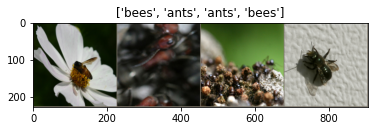

In [3]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

<u>**Training the model**</u>



In [4]:
# This is a general function to train a model
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc:4f}')

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

<u>**Visualizing the model predictions**</u>

In [5]:
# This is a generic function to display predictions for a few images
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title(f'predicted: {class_names[preds[j]]}')
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

Now, to use the ConvNet, as discussed before, we need to freeze the entire network expect the final layer. We also need to set requires_grad = False to freeze the parameters so that the gradients are not computed in backward().

In [6]:
model_conv = torchvision.models.resnet18(pretrained=True)
for param in model_conv.parameters():
    param.requires_grad = False

# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, 2)

model_conv = model_conv.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that only parameters of final layer are being optimized as
# opposed to before.
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

<u>**Train and evaluate**</u>

In [7]:
model_conv = train_model(model_conv, criterion, optimizer_conv, exp_lr_scheduler, num_epochs=25)

Epoch 0/24
----------
train Loss: 0.6194 Acc: 0.6844
val Loss: 0.2135 Acc: 0.9346

Epoch 1/24
----------
train Loss: 0.4921 Acc: 0.7500
val Loss: 0.1917 Acc: 0.9281

Epoch 2/24
----------
train Loss: 0.4125 Acc: 0.8320
val Loss: 0.2044 Acc: 0.9346

Epoch 3/24
----------
train Loss: 0.4526 Acc: 0.7992
val Loss: 0.1839 Acc: 0.9216

Epoch 4/24
----------
train Loss: 0.2973 Acc: 0.8852
val Loss: 0.1865 Acc: 0.9477

Epoch 5/24
----------
train Loss: 0.3553 Acc: 0.8484
val Loss: 0.1902 Acc: 0.9346

Epoch 6/24
----------
train Loss: 0.3792 Acc: 0.8320
val Loss: 0.2030 Acc: 0.9281

Epoch 7/24
----------
train Loss: 0.3329 Acc: 0.8443
val Loss: 0.1989 Acc: 0.9346

Epoch 8/24
----------
train Loss: 0.3588 Acc: 0.8566
val Loss: 0.1751 Acc: 0.9346

Epoch 9/24
----------
train Loss: 0.2598 Acc: 0.9057
val Loss: 0.1738 Acc: 0.9477

Epoch 10/24
----------
train Loss: 0.2475 Acc: 0.8730
val Loss: 0.1815 Acc: 0.9412

Epoch 11/24
----------
train Loss: 0.3152 Acc: 0.8484
val Loss: 0.1823 Acc: 0.9412

Ep

<u>**Visualizing the predictions**</u>

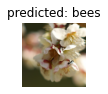

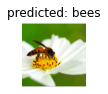

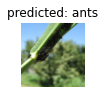

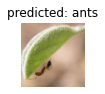

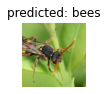

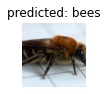

In [8]:
visualize_model(model_conv)

plt.ioff()
plt.show()

## **Task 10**

Write a function that outputs ResNet18 features for a given input image. Extract features for training images (in image_datasets['train']). You should get an Nx512 dimensional array. 

In [9]:
from PIL import Image
from torch.autograd import Variable

# Reference Used : https://becominghuman.ai/extract-a-feature-vector-for-any-image-with-pytorch-9717561d1d4c

# ResNet-18 expects images to be at least 224x224, as well as normalized with a specific mean and standard deviation. 
# Hence, we will first define some PyTorch transforms:

scaler = transforms.Resize((224, 224))
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
to_tensor = transforms.ToTensor()

# Use the model object to select the desired layer
layer = model_conv._modules.get('avgpool')

In [10]:
# Additional reference used to get around a bug in the code : https://stackoverflow.com/questions/61606416/runtimeerror-output-with-shape-512-doesnt-match-the-broadcast-shape-1-512

def get_vector(inputs):
    # Create a PyTorch Variable with the transformed image
    t_img = Variable(inputs.unsqueeze(0))
    # Create a vector of zeros that will hold our feature vector
    my_embedding = torch.zeros(512) # The 'avgpool' layer has an output size of 512
    # Define an inner function that will copy the output of a layer
    def copy_data(m, i, o):
        my_embedding.copy_(o.data.reshape(o.data.size(1)))
    # Attach that function to our selected layer
    h = layer.register_forward_hook(copy_data)
    # Run the model on our transformed image
    model_conv(t_img)
    # Detach our copy function from the layer
    h.remove()
    # Return the feature vector
    return my_embedding

In [11]:
features = np.zeros((512,1))
labels = np.zeros((1,1))
for img in image_datasets['train']: # img[0] is a PyTorch tensor whereas img[1] refers to the class : ants/bees
    img_tensor = img[0].to(device)
    img_feature = get_vector(img_tensor)
    img_feature = img_feature.numpy()
    img_feature = img_feature.reshape(len(img_feature),1)
    features = np.concatenate((features, img_feature), axis = 1)
    img_label = img[1]
    img_label = np.array(img_label)
    img_label = img_label.reshape(1,1)
    labels = np.concatenate((labels, img_label), axis = 1)
features = features.T
labels = labels.T 

In [12]:
x = features[1:,:]
y = labels[1:,:]

## **Task 11**

Compare L2 regularized logistic regression, RBF kernel SVM (do grid search on kernel width and regularization), and random forest (do grid search on max depth and number of trees). Test the final model on test data and show the results -- accuracy and F1 score.

In [42]:
# Reference Used : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression
# L2 regularized logistic regression (performing a grid search on maximum number of iterations and 'C' which is the inverse of regularization strength)
hyper = {'C' : np.logspace(-3,3,7), 'max_iter' : [2000,3000,4000,5000]}
lg = LogisticRegression(penalty='l2', solver='saga')
scoring = ['balanced_accuracy','f1','roc_auc']
for i in scoring:
  clf = GridSearchCV(estimator = lg, param_grid = hyper, scoring = i) # since cv = None -> We wish to use the default 5-fold cross validation splitting strategy
  clf.fit(np.array(x),np.squeeze(y))
  print('Best hyperparameter : ', clf.best_params_) # Print best parameter after tuning
  print('Best ' + i + ' : ' + str(clf.best_score_))

Best hyperparameter :  {'C': 0.01, 'max_iter': 2000}
Best balanced_accuracy : 0.9423333333333332
Best hyperparameter :  {'C': 0.01, 'max_iter': 2000}
Best f1 : 0.9412050570459451
Best hyperparameter :  {'C': 0.01, 'max_iter': 2000}
Best roc_auc : 0.9865416666666667


In [26]:
hyper = {'C' : [0.001,0.01,0.1,1,10], 'degree' : [2,3,5,7]} # Regularization and kernel width are the only hyperparameters that are to be tuned
svc = svm.SVC(kernel='rbf', probability = True)
scoring = ['balanced_accuracy', 'f1', 'roc_auc']

for i in scoring:
  clf = GridSearchCV(estimator = svc, param_grid = hyper, scoring = i) # since cv = None -> We wish to use the default 5-fold cross validation splitting strategy
  clf.fit(np.array(x),np.squeeze(y))
  print('Best hyperparameter : ', clf.best_params_) # Print best parameter after tuning
  print('Best ' + i + ' : ' + str(clf.best_score_))

Best hyperparameter :  {'C': 10, 'degree': 2}
Best balanced_accuracy : 0.9381666666666666
Best hyperparameter :  {'C': 10, 'degree': 2}
Best f1 : 0.9365797101449275
Best hyperparameter :  {'C': 1, 'degree': 2}
Best roc_auc : 0.9788055555555555


In [34]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
param = {'max_depth' : [2,4,6,8,10], 'max_features' : ['auto','sqrt','log2']}
scoring = ['balanced_accuracy','f1','roc_auc']

for i in scoring:
  clf = GridSearchCV(estimator = rf, param_grid = param, scoring = i, n_jobs = -1)
  clf.fit(np.array(x),np.squeeze(y))
  print('Best hyperparameter : ', clf.best_params_) # Print best parameter after tuning
  print('Best ' + i + ' : ' + str(clf.best_score_))

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best hyperparameter :  {'max_depth': 10, 'max_features': 'auto'}
Best balanced_accuracy : 0.9381666666666668


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best hyperparameter :  {'max_depth': 10, 'max_features': 'auto'}
Best f1 : 0.9400899256683581
Best hyperparameter :  {'max_depth': 6, 'max_features': 'log2'}
Best roc_auc : 0.9795


In [14]:
features_test = np.zeros((512,1))
labels_test = np.zeros((1,1))
for img in image_datasets['val']: # Due to the unavailability of the testing dataset, I am hence evaluating the performance of my model on the validation dataset
    img_tensor = img[0].to(device)
    img_feature = get_vector(img_tensor)
    img_feature = img_feature.numpy()
    img_feature = img_feature.reshape(len(img_feature),1)
    features_test = np.concatenate((features_test, img_feature), axis = 1)
    img_label = img[1]
    img_label = np.array(img_label)
    img_label = img_label.reshape(1,1)
    labels_test = np.concatenate((labels_test, img_label), axis = 1)
features_test = features_test.T
labels_test = labels_test.T 

In [15]:
x_test = features_test[1:,:]
y_test = labels_test[1:,:]

In [20]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# Best Model -> L2 regularized logistic regression with C = 0.01 and max_iter = 2000
lg = LogisticRegression(penalty = 'l2', solver = 'saga', C = 0.01, max_iter = 2000)

lg.fit(np.array(x),np.squeeze(y))

# Predicted target variables for binary class
y_pred = lg.predict(x_test) 

# Checking accuracy of model on test data
f1 = f1_score(y_pred, y_test)
print('f1: %.3f' % (f1*100))
roc = roc_auc_score(y_pred, y_test)
print('roc: %.3f' % (roc*100))
balanced_accuracy = balanced_accuracy_score(y_pred, y_test)
print('balanced_accuracy: %.3f' % (balanced_accuracy*100)) 

f1: 94.410
roc: 94.051
balanced_accuracy: 94.051


## **Task 12**
Summarize your findings and write your references.

<b> Observations </b>

<table>
  <tr>
    <th>Model</th>
    <th>Highest balanced_accuracy score</th>
    <th>Highest f1 score</th>
    <th>Highest roc_auc score</th>
  </tr>
  <tr>
    <td>Logistic Regression with L2 penalty</td>
    <td> 0.9423333333333332
    </td>
    <td> 0.9412050570459451
    </td>
    <td> 0.9865416666666667
    </td>
  </tr>

  <tr>
    <td>SVM with RBF kernel</td>
    <td> 0.9381666666666666
    </td>
    <td> 0.9365797101449275
    </td>
    <td> 0.9788055555555555
    </td>
  </tr>

  <tr>
    <td>Random Forest</td>
    <td> 0.9381666666666668
    </td> 
    <td> 0.9400899256683581
    </td>
    <td> 0.9795
    </td>
  </tr>
</table>

1.  Here, we can clearly see that the Logistic Regression model with L2 penalty outperforms the other models in all the scenarios (balanced_accuracy, f1, roc_auc). 
2.  The best hyperparameter obtained for the Logistic Regression model was C = 0.01 and max_iter = 2000
3.  Hence, the performance of this model was then evaluated on the validation dataset (due to the unavailablity of the testing dataset) and we obtained the following results : 
    
    (a) f1: 94.410 <br>
    (b) roc: 94.051 <br>
    (c) balanced_accuracy: 94.051 

<b> References </b>

1.   For Python related syntax queries : [GeeksForGeeks](https://www.geeksforgeeks.org/)
2.   For Python related debugging queries : [StackOverflow](https://stackoverflow.com/)
3.   To get a better understanding of the problem statement : <u> **Feature Engineering and Selection** </u> Slides provided by Prof. Amit Sethi, IIT Bombay
4.   Bishop - Pattern Recognition And Machine Learning - Springer - 2006 Edition
5.   To understand and implement the functionalities provided by the <u> **PyTorch** </u> library - [PyTorch](https://pytorch.org/)
6.   To understand and implement the functionalities provided by the <u> **scikit-learn** </u> library - [scikit-learn](https://scikit-learn.org/stable/)

